In [1]:
import pandas as pd
import numpy as np
from collections import Counter as c
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pickle

In [2]:
data= pd.read_csv("kidney_disease.csv")
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [4]:
data.columns= ['id', 'age', 'blood_pressure', 'specify_gravity', 'albumin', 'sugar', 'red_blood_cells',
               'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random',
               'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume',
               'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease',
               'appetite', 'pedal_edema', 'anemia', 'class']

data.columns

Index(['id', 'age', 'blood_pressure', 'specify_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specify_gravity          353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [6]:
data.isnull().any()

id                         False
age                         True
blood_pressure              True
specify_gravity             True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood_glucose_random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetes_mellitus           True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
class                      False
dtype: bool

In [7]:
# Convert columns with numeric values stored as strings to numeric
data['packed_cell_volume'] = pd.to_numeric(data['packed_cell_volume'], errors='coerce')
data['white_blood_cell_count'] = pd.to_numeric(data['white_blood_cell_count'], errors='coerce')
data['red_blood_cell_count'] = pd.to_numeric(data['red_blood_cell_count'], errors='coerce')

data['blood_glucose_random'].fillna(data['blood_glucose_random'].mean(), inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(), inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(), inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(), inplace=True)
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(), inplace=True)
data['potassium'].fillna(data['potassium'].mean(), inplace=True)
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(), inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(), inplace=True)
data['sodium'].fillna(data['sodium'].mean(), inplace=True)
data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean(), inplace=True)
data['age'].fillna(data['age'].mean(), inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0], inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0], inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0], inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0], inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0], inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0], inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0], inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0], inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0], inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0], inplace=True)
data['diabetes_mellitus'].fillna(data['diabetes_mellitus'].mode()[0], inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0], inplace=True)
data['specify_gravity'].fillna(data['specify_gravity'].mode()[0], inplace=True)

C:\Users\Anand Bandgar\AppData\Local\Temp\ipykernel_19292\482613296.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['blood_glucose_random'].fillna(data['blood_glucose_random'].mean(), inplace=True)
C:\Users\Anand Bandgar\AppData\Local\Temp\ipykernel_19292\482613296.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

In [8]:
catcols= set(data.dtypes[data.dtypes=='O'].index.values)
print(catcols)

{'coronary_artery_disease', 'anemia', 'bacteria', 'pedal_edema', 'appetite', 'pus_cell_clumps', 'class', 'pus_cell', 'red_blood_cells', 'hypertension', 'diabetes_mellitus'}


In [9]:
for i in catcols:
    print("Columns :" ,i)
    print(c(data[i]))
    print('*'*120+'\n')

Columns : coronary_artery_disease
Counter({'no': 364, 'yes': 34, '\tno': 2})
************************************************************************************************************************

Columns : anemia
Counter({'no': 340, 'yes': 60})
************************************************************************************************************************

Columns : bacteria
Counter({'notpresent': 378, 'present': 22})
************************************************************************************************************************

Columns : pedal_edema
Counter({'no': 324, 'yes': 76})
************************************************************************************************************************

Columns : appetite
Counter({'good': 318, 'poor': 82})
************************************************************************************************************************

Columns : pus_cell_clumps
Counter({'notpresent': 358, 'present': 42})
***********************

In [10]:
catcols.discard('red_blood_cell_count')
catcols.discard('packed_cell_volume')
catcols.discard('white_blood_cell_count')
print(catcols)

{'coronary_artery_disease', 'anemia', 'bacteria', 'pedal_edema', 'appetite', 'pus_cell_clumps', 'class', 'pus_cell', 'red_blood_cells', 'hypertension', 'diabetes_mellitus'}


In [12]:
catcols= ['anemia', 'pedal_edema', 'appetite', 'class', 'coronary_artery_disease', 'diabetes_mellitus', 'hypertension', 'pus_cell', 'pus_cell_clumps', 'red_blood_cells']

In [13]:
for i in catcols:
    print("LABEL ENCODING OF:", i)
    LEi = LabelEncoder()
    print(c(data[i]))
    data[i] = LEi.fit_transform(data[i])
    print(c(data[i]))
    print("*"*100)

LABEL ENCODING OF: anemia
Counter({0: 340, 1: 60})
Counter({0: 340, 1: 60})
****************************************************************************************************
LABEL ENCODING OF: pedal_edema
Counter({0: 324, 1: 76})
Counter({0: 324, 1: 76})
****************************************************************************************************
LABEL ENCODING OF: appetite
Counter({0: 318, 1: 82})
Counter({0: 318, 1: 82})
****************************************************************************************************
LABEL ENCODING OF: class
Counter({0: 248, 2: 150, 1: 2})
Counter({0: 248, 2: 150, 1: 2})
****************************************************************************************************
LABEL ENCODING OF: coronary_artery_disease
Counter({1: 364, 2: 34, 0: 2})
Counter({1: 364, 2: 34, 0: 2})
****************************************************************************************************
LABEL ENCODING OF: diabetes_mellitus
Counter({3: 260, 4: 134, 0: 3

In [14]:
contcols= set(data.dtypes[data.dtypes!='O'].index.values)
print(contcols)

{'specify_gravity', 'serum_creatinine', 'coronary_artery_disease', 'red_blood_cell_count', 'diabetes_mellitus', 'albumin', 'anemia', 'red_blood_cells', 'id', 'hypertension', 'class', 'age', 'potassium', 'white_blood_cell_count', 'sugar', 'hemoglobin', 'packed_cell_volume', 'blood_glucose_random', 'pedal_edema', 'pus_cell', 'blood_pressure', 'blood_urea', 'sodium', 'appetite', 'pus_cell_clumps'}


In [15]:
for i in contcols:
    print("Continuous Columns :" ,i)
    print(c(data[i]))
    print('*'*120+'\n')

Continuous Columns : specify_gravity
Counter({1.02: 153, 1.01: 84, 1.025: 81, 1.015: 75, 1.005: 7})
************************************************************************************************************************

Continuous Columns : serum_creatinine
Counter({1.2: 40, 1.1: 24, 1.0: 23, 0.5: 23, 0.7: 22, 0.9: 22, 0.6: 18, 0.8: 17, 3.072454308093995: 17, 2.2: 10, 1.5: 9, 1.7: 9, 1.3: 8, 1.6: 8, 1.8: 7, 1.4: 7, 2.5: 7, 2.8: 7, 1.9: 6, 2.7: 5, 2.1: 5, 2.0: 5, 3.2: 5, 3.3: 5, 3.9: 4, 7.3: 4, 4.0: 3, 2.4: 3, 3.4: 3, 2.9: 3, 5.3: 3, 2.3: 3, 7.2: 2, 4.6: 2, 4.1: 2, 5.2: 2, 6.3: 2, 3.0: 2, 6.1: 2, 6.7: 2, 5.6: 2, 6.5: 2, 4.4: 2, 6.0: 2, 3.8: 1, 24.0: 1, 9.6: 1, 76.0: 1, 7.7: 1, 10.8: 1, 5.9: 1, 3.25: 1, 9.7: 1, 6.4: 1, 32.0: 1, 8.5: 1, 15.0: 1, 3.6: 1, 10.2: 1, 11.5: 1, 12.2: 1, 9.2: 1, 13.8: 1, 16.9: 1, 7.1: 1, 18.0: 1, 13.0: 1, 48.1: 1, 14.2: 1, 16.4: 1, 2.6: 1, 7.5: 1, 4.3: 1, 18.1: 1, 11.8: 1, 9.3: 1, 6.8: 1, 13.5: 1, 12.8: 1, 11.9: 1, 12.0: 1, 13.4: 1, 15.2: 1, 13.3: 1, 0.4: 1})
*

In [16]:
contcols.remove('specify_gravity')
contcols.remove('albumin')
contcols.remove('sugar')
print(contcols)

{'serum_creatinine', 'coronary_artery_disease', 'red_blood_cell_count', 'diabetes_mellitus', 'anemia', 'red_blood_cells', 'id', 'hypertension', 'class', 'age', 'potassium', 'white_blood_cell_count', 'hemoglobin', 'packed_cell_volume', 'blood_glucose_random', 'pedal_edema', 'pus_cell', 'blood_pressure', 'blood_urea', 'sodium', 'appetite', 'pus_cell_clumps'}


In [17]:
contcols.add('red_blood_cell_count')
contcols.add('packed_cell_volume')
contcols.add('white_blood_cell_count')
print(contcols)

{'serum_creatinine', 'coronary_artery_disease', 'red_blood_cell_count', 'diabetes_mellitus', 'anemia', 'red_blood_cells', 'id', 'hypertension', 'class', 'age', 'potassium', 'white_blood_cell_count', 'hemoglobin', 'packed_cell_volume', 'blood_glucose_random', 'pedal_edema', 'pus_cell', 'blood_pressure', 'blood_urea', 'sodium', 'appetite', 'pus_cell_clumps'}


In [18]:
catcols.append('specify_gravity')
catcols.append('albumin')
catcols.append('sugar')
print(catcols)

['anemia', 'pedal_edema', 'appetite', 'class', 'coronary_artery_disease', 'diabetes_mellitus', 'hypertension', 'pus_cell', 'pus_cell_clumps', 'red_blood_cells', 'specify_gravity', 'albumin', 'sugar']


In [19]:
data['coronary_artery_disease' ] = data. coronary_artery_disease.replace('\tno','no')
c(data['coronary_artery_disease' ])

Counter({1: 364, 2: 34, 0: 2})

In [20]:
data['diabetes_mellitus'] = data.diabetes_mellitus.replace(to_replace={'\tno': 'no', '\tyes': 'yes', '\tno\t': 'no', '\tyes\t': 'yes'})
c(data['diabetes_mellitus'])

Counter({3: 260, 4: 134, 0: 3, 1: 2, 2: 1})

In [21]:
data.describe()

,id,age,blood_pressure,specify_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
count,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,51.483376,76.469072,1.017712,0.90000,0.395000,0.882500,0.810000,0.105000,148.036517,...,38.884498,8406.122449,4.707435,0.367500,3.300000,1.080000,0.205000,0.190000,0.150000,0.755000
std,115.614301,16.974966,13.476298,0.005434,1.31313,1.040038,0.322418,0.392792,0.306937,74.782634,...,8.151081,2523.219976,0.840314,0.482728,0.579517,0.289499,0.404207,0.392792,0.357519,0.968152
min,0.000000,2.000000,50.000000,1.005000,0.00000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.750000,42.000000,70.000000,1.015000,0.00000,0.000000,1.000000,1.000000,0.000000,101.000000,...,34.000000,6975.000000,4.500000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,199.500000,54.000000,78.234536,1.020000,0.00000,0.000000,1.000000,1.000000,0.000000,126.000000,...,38.884498,8406.122449,4.707435,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,299.250000,64.000000,80.000000,1.020000,2.00000,0.000000,1.000000,1.000000,0.000000,150.000000,...,44.000000,9400.000000,5.100000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,2.000000
max,399.000000,90.000000,180.000000,1.025000,5.00000,5.000000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,8.000000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000,2.000000


C:\Users\Anand Bandgar\AppData\Local\Temp\ipykernel_19292\4156840497.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.age)


<Axes: xlabel='age', ylabel='Density'>

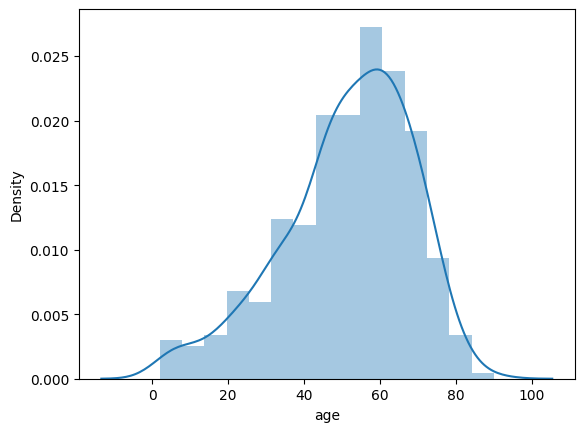

In [22]:
sns.distplot(data.age)

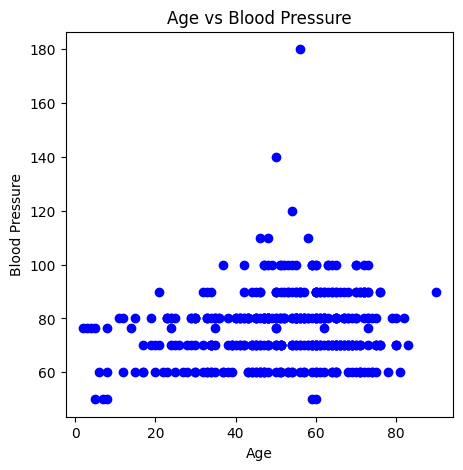

In [23]:
fig = plt.figure(figsize=(5,5))
plt.scatter(data['age'], data['blood_pressure'], color='blue')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title('Age vs Blood Pressure')
plt.show()

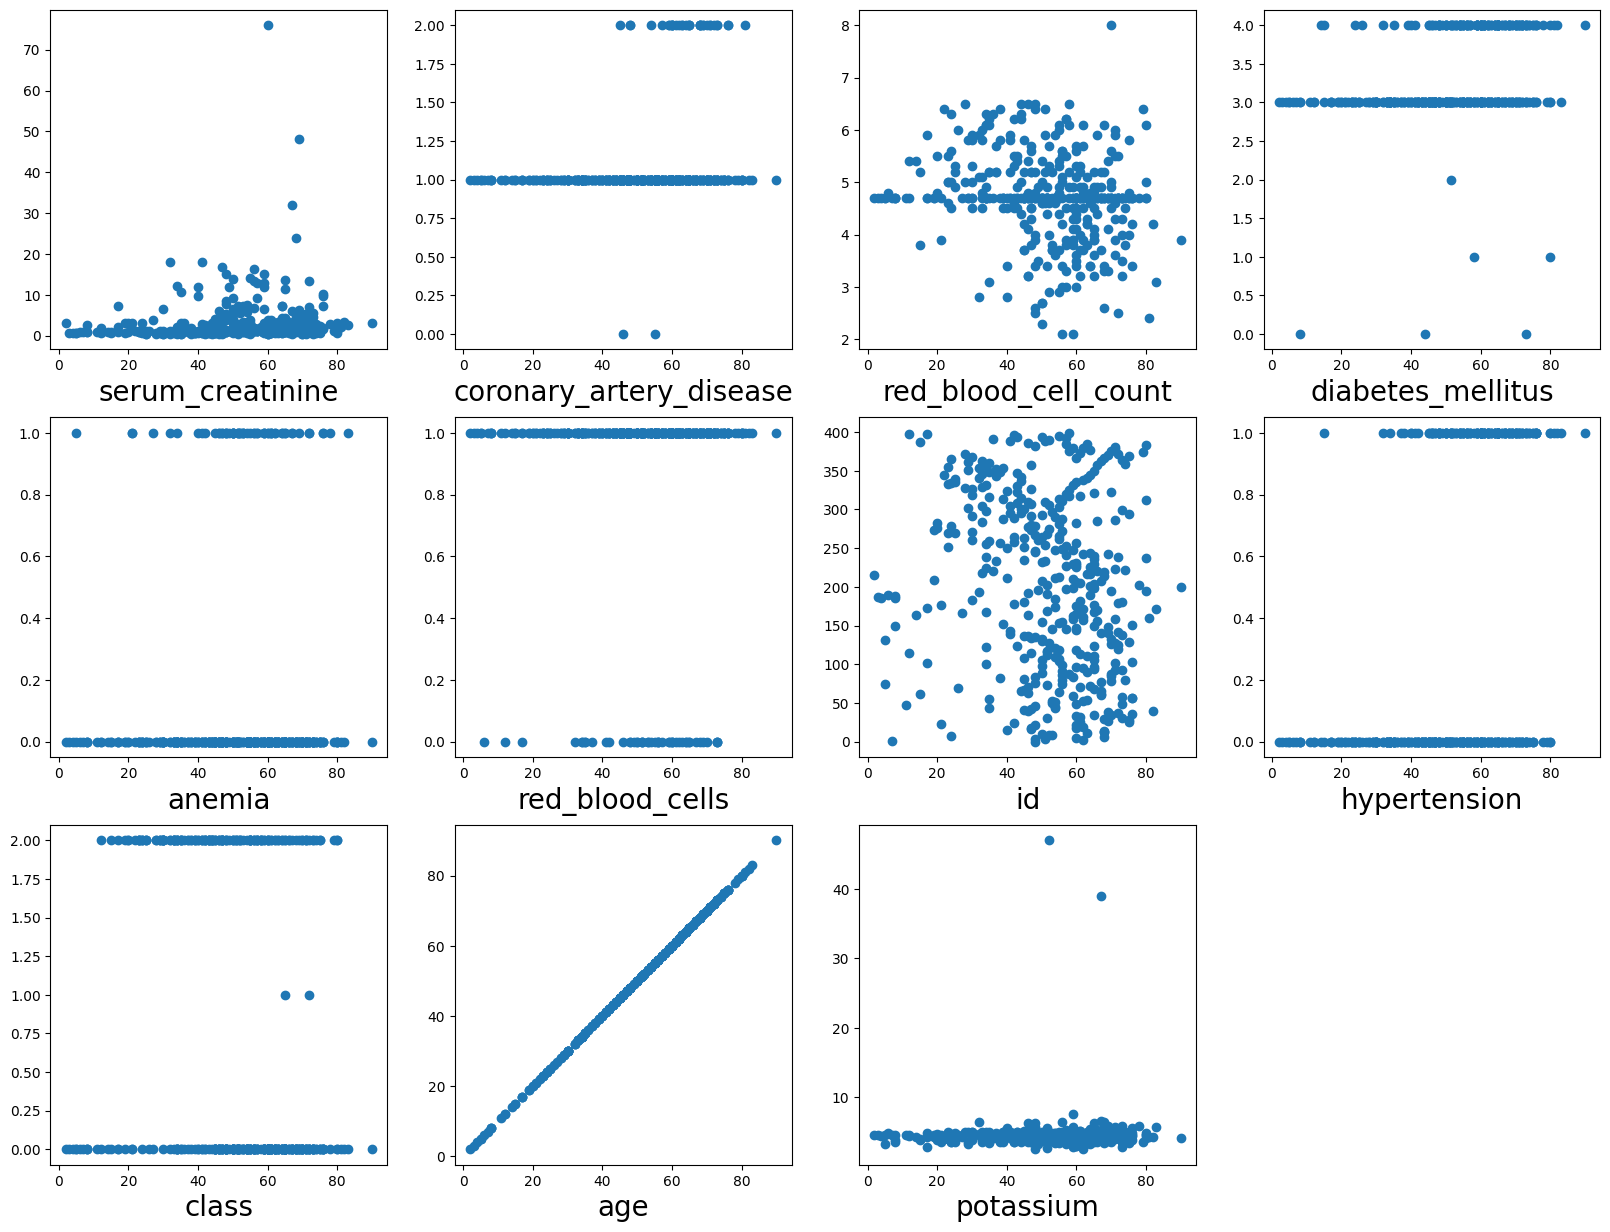

In [24]:
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1
for column in contcols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        plt.scatter(data['age'], data[column])
        plt.xlabel(column, fontsize=20)

    plotnumber += 1

plt.show()

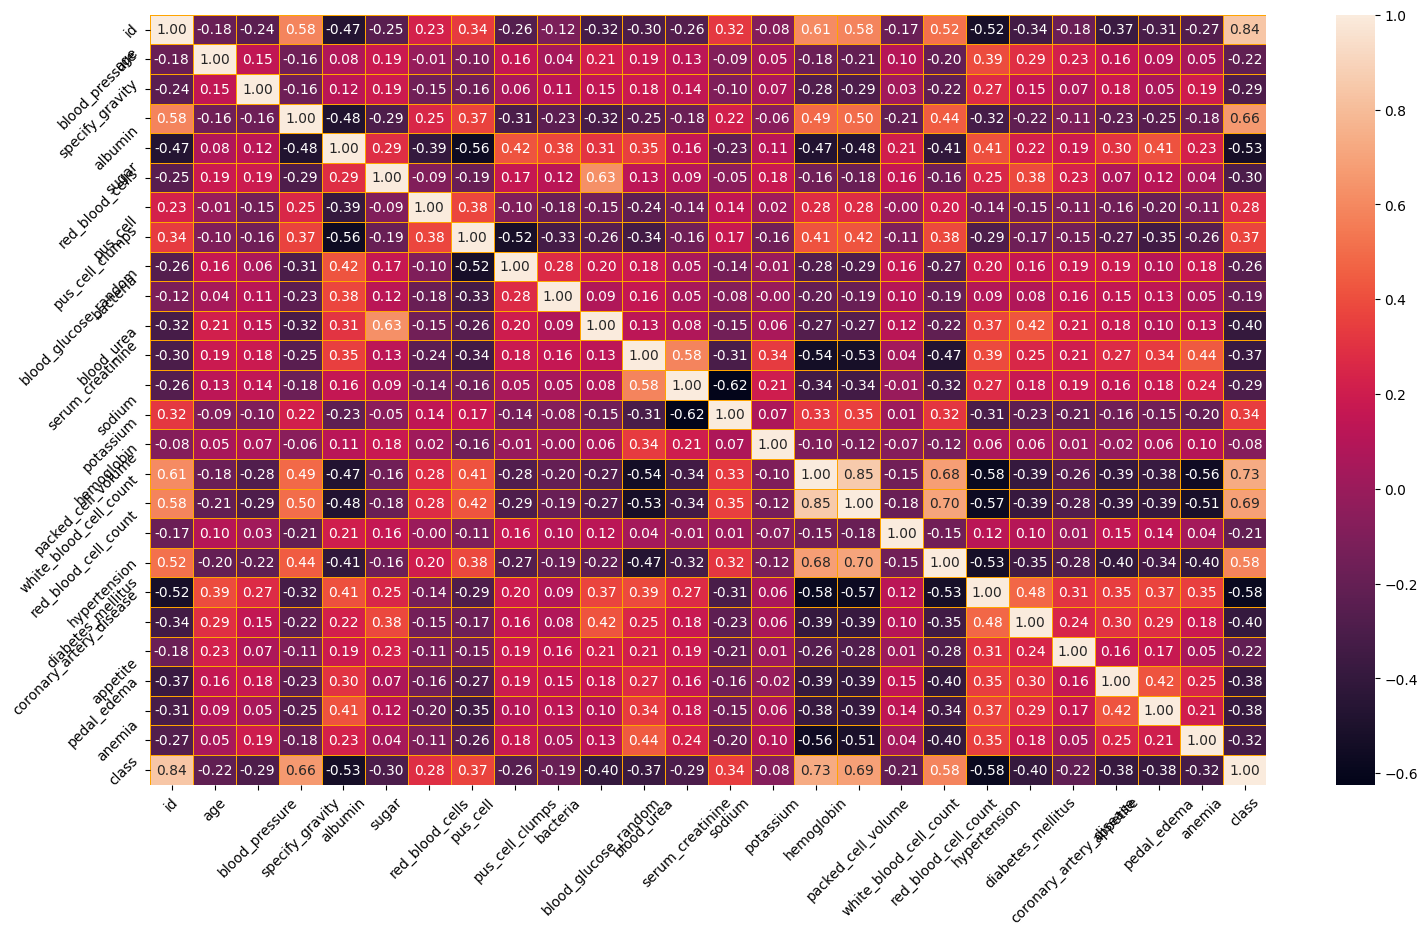

In [25]:
# Encode 'bacteria' column to numeric for correlation calculation
data_encoded = data.copy()
data_encoded['bacteria'] = data_encoded['bacteria'].map({'notpresent': 0, 'present': 1})

f, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(data_encoded.corr(), annot=True, fmt=".2f", ax=ax, linewidths=0.5, linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

<Axes: ylabel='count'>

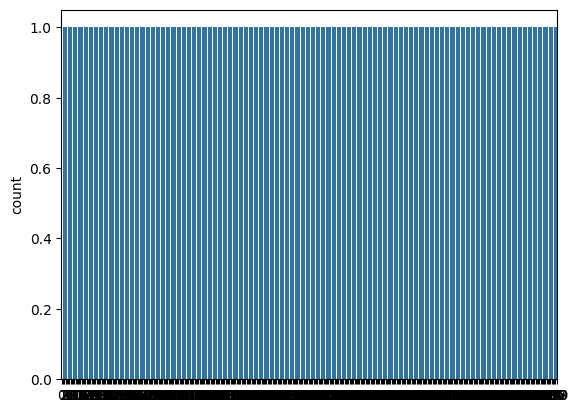

In [26]:
sns.countplot(data['class'])

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
# Encode 'bacteria' column to numeric for scaling
x = data.drop('class', axis=1).copy()
x['bacteria'] = x['bacteria'].map({'notpresent': 0, 'present': 1})

In [29]:
sc = StandardScaler()
x_bal = sc.fit_transform(x)

In [30]:
# Fix string literal, column names, and typos
selcols = [
	'red_blood_cells', 
	'pus_cell', 
	'blood_glucose_random', 
	'blood_urea',
	'pedal_edema', 
	'anemia', 
	'diabetes_mellitus', 
	'coronary_artery_disease'
]
x = pd.DataFrame(data, columns=selcols)
y = pd.DataFrame(data, columns=['class'])
print(x.shape)
print(y.shape)

(400, 8)
(400, 1)


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [32]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [33]:
classification = Sequential()
classification.add(Dense(30,activation='relu'))
classification.add(Dense(128,activation='relu'))
classification.add(Dense(64,activation='relu'))
classification.add(Dense(32,activation='relu'))
classification.add(Dense(1,activation='sigmoid'))

In [34]:
classification.compile(optimizer='adam',loss='binary_crossentropy' ,metrics=['accuracy'])

In [35]:
classification.fit(x_train,y_train,batch_size=10,validation_split=0.2,epochs=100)


Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.2775 - loss: 3.0207 - val_accuracy: 0.1875 - val_loss: 0.5207
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2087 - loss: 0.5767 - val_accuracy: 0.2031 - val_loss: 0.4284
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2239 - loss: 0.4558 - val_accuracy: 0.2031 - val_loss: 0.4963
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2433 - loss: 0.4391 - val_accuracy: 0.4062 - val_loss: 0.3732
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2199 - loss: 0.5305 - val_accuracy: 0.2031 - val_loss: 0.6541
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2343 - loss: 0.5976 - val_accuracy: 0.2031 - val_loss: 0.5393
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2211 - loss: 0.5095 - val_accuracy: 0.1875 - val_loss: 0.7575
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1830 - loss: 0.3846 - val_accuracy: 0.4688 - 

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion='entropy')


In [37]:
rfc.fit(x_train,y_train)

d:\Python IDE\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [38]:
y_predict = rfc.predict(x_test)

In [39]:
y_predict_train = rfc.predict(x_train)

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dtc = DecisionTreeClassifier(max_depth=4, splitter='best', criterion='entropy')


In [42]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [43]:
y_predict= dtc.predict(x_test)
y_predict

array([0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2,
       0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0], dtype=int64)

In [44]:
y_predict_train = dtc.predict(x_train)

In [45]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(x_train,y_train)

d:\Python IDE\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Python IDE\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
from sklearn.metrics import accuracy_score, classification_report


In [47]:
y_predict = lgr.predict(x_test)

In [48]:
# logistic Regression

y_pred = lgr.predict([[1,1,121.000000,36.0,0,0,1,0]])

print(y_pred)
(y_pred)

[2]


d:\Python IDE\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

In [49]:
# DecisionTree classifier

y_pred = dtc.predict([[1,1,121.000000,36.0,0,0,1,0]])

print(y_pred)
(y_pred)

[2]


d:\Python IDE\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

In [50]:
# Random Forest Classifier |
y_pred = rfc.predict([[1,1,121.000000,36.0,0,0,1,0]])

print(y_pred)
(y_pred)

[2]


d:\Python IDE\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

In [51]:
classification.save("ckd.h5")

In [52]:
# Testing the model

y_pred = classification.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [53]:
y_pred

array([[1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],

In [54]:
y_pred = (y_pred > 0.5)
y_pred

array([[ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [

In [55]:
def predict_exit(sample_value):
	# Convert list to numpy array
	sample_value = np.array(sample_value)

	# Reshape because sample_value contains only 1 record
	sample_value = sample_value.reshape(1, -1)

	# Feature Scaling
	sample_value = sc.transform(sample_value)

	return classification.predict(sample_value)

In [56]:
import numpy as np

In [57]:
sample = np.array([[1,1,121.000000,36.0,0,0,1,0]])
test = classification.predict(sample)
if test[0][0] > 0.5:
    print('Prediction: High chance of CKD!')
else:
    print('Prediction: Low chance of CKD.')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction: High chance of CKD!


In [58]:
from sklearn import model_selection

In [60]:
dfs = []
models = [
    ('RF', RandomForestClassifier()),
    ('DecisionTree', DecisionTreeClassifier()),
    ('LogReg', LogisticRegression()),
]

results = []
names = []
# Use 'roc_auc_ovr' for multiclass
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc_ovr']
target_names = ['NO CKD', 'CKD', 'Other']

for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
    cv_results = model_selection.cross_validate(model, x_train, y_train.values.ravel(), cv=kfold, scoring=scoring)
    clf = model.fit(x_train, y_train.values.ravel())
    y_pred = clf.predict(x_test)
    print(name)
    print(classification_report(y_test, y_pred, target_names=target_names))
    results.append(cv_results)
    names.append(name)
    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)

final = pd.concat(dfs, ignore_index=True)
final

d:\Python IDE\Lib\site-packages\sklearn\model_selection\_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Python IDE\Lib\site-packages\sklearn\metrics\_scorer.py", line 137, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "d:\Python IDE\Lib\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Python IDE\Lib\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "d:\Python IDE\Lib\site-packages\sklearn\metrics\_ranking.py", line 634, in roc_auc_score
    return _multiclass_roc_auc_score(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Python IDE\Lib\site-packages\sklearn\

RF
              precision    recall  f1-score   support

      NO CKD       0.94      0.96      0.95        53
         CKD       0.00      0.00      0.00         1
       Other       0.92      0.92      0.92        26

    accuracy                           0.94        80
   macro avg       0.62      0.63      0.63        80
weighted avg       0.93      0.94      0.93        80

DecisionTree
              precision    recall  f1-score   support

      NO CKD       0.91      0.94      0.93        53
         CKD       0.00      0.00      0.00         1
       Other       0.88      0.85      0.86        26

    accuracy                           0.90        80
   macro avg       0.60      0.60      0.60        80
weighted avg       0.89      0.90      0.89        80



d:\Python IDE\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python IDE\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python IDE\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python IDE\Lib\site-packages\sklearn\model_selection\_validation.py:10

LogReg
              precision    recall  f1-score   support

      NO CKD       0.98      0.91      0.94        53
         CKD       0.00      0.00      0.00         1
       Other       0.84      1.00      0.91        26

    accuracy                           0.93        80
   macro avg       0.61      0.64      0.62        80
weighted avg       0.92      0.93      0.92        80



d:\Python IDE\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Python IDE\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python IDE\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zer

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc_ovr,model
0,0.234497,0.152757,0.953125,0.953756,0.953125,0.953206,NaN,RF
1,0.238847,0.083521,0.937500,0.923077,0.937500,0.930147,NaN,RF
2,0.241358,0.027015,0.921875,0.934896,0.921875,0.922751,NaN,RF
3,0.208937,0.029233,0.875000,0.894118,0.875000,0.876877,NaN,RF
4,0.229647,0.030035,0.906250,0.909571,0.906250,0.903693,NaN,RF
5,0.003996,0.014035,0.906250,0.906250,0.906250,0.906250,NaN,DecisionTree
6,0.003000,0.013011,0.906250,0.892428,0.906250,0.899203,NaN,DecisionTree
7,0.005019,0.013216,0.875000,0.878253,0.875000,0.875759,NaN,DecisionTree
8,0.004054,0.013267,0.875000,0.884921,0.875000,0.876518,NaN,DecisionTree
9,0.004018,0.012024,0.828125,0.854154,0.828125,0.839616,NaN,DecisionTree


In [61]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[48,  0,  5],
       [ 1,  0,  0],
       [ 0,  0, 26]], dtype=int64)

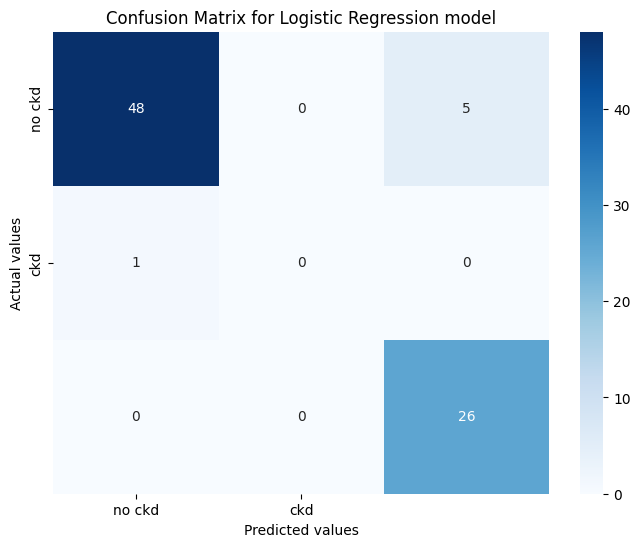

In [62]:
# Plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no ckd', 'ckd' ], yticklabels=['no ckd', 'ckd' ])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression model')
plt.show()

In [63]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[48,  0,  5],
       [ 1,  0,  0],
       [ 0,  0, 26]], dtype=int64)

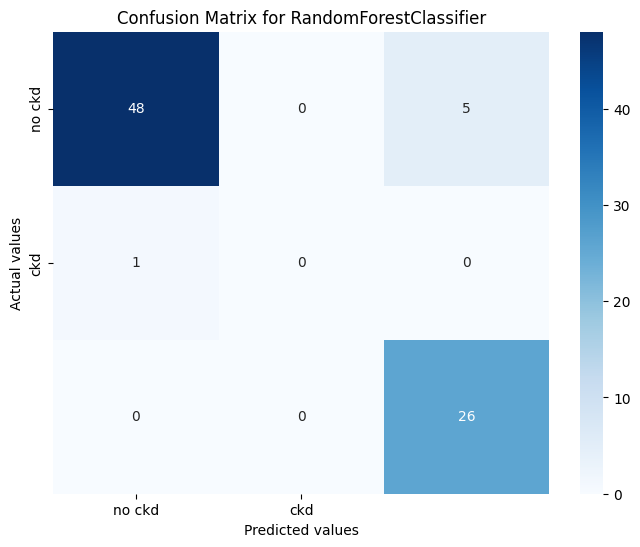

In [64]:
# Plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no ckd', 'ckd'], yticklabels=['no ckd', 'ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

In [65]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[48,  0,  5],
       [ 1,  0,  0],
       [ 0,  0, 26]], dtype=int64)

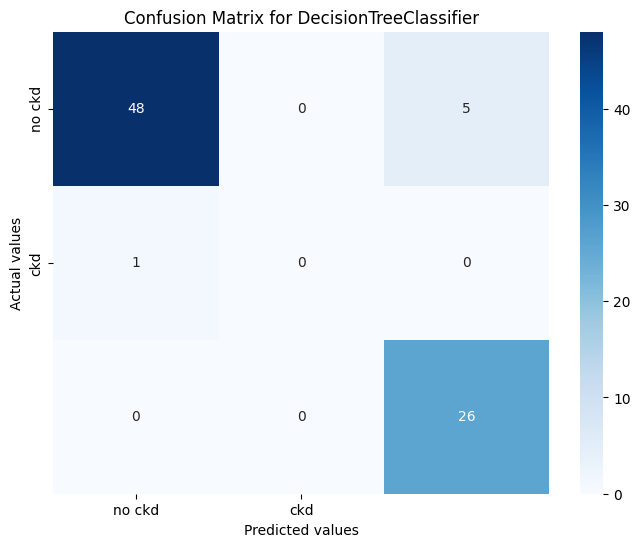

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        53
           1       0.00      0.00      0.00         1
           2       0.84      1.00      0.91        26

    accuracy                           0.93        80
   macro avg       0.61      0.64      0.62        80
weighted avg       0.92      0.93      0.92        80



d:\Python IDE\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python IDE\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python IDE\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [66]:
# Plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no ckd', 'ckd' ], yticklabels=['no ckd', 'ckd' ])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for DecisionTreeClassifier')
plt.show()

print (classification_report(y_test, y_pred))

In [67]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[48,  0,  5],
       [ 1,  0,  0],
       [ 0,  0, 26]], dtype=int64)

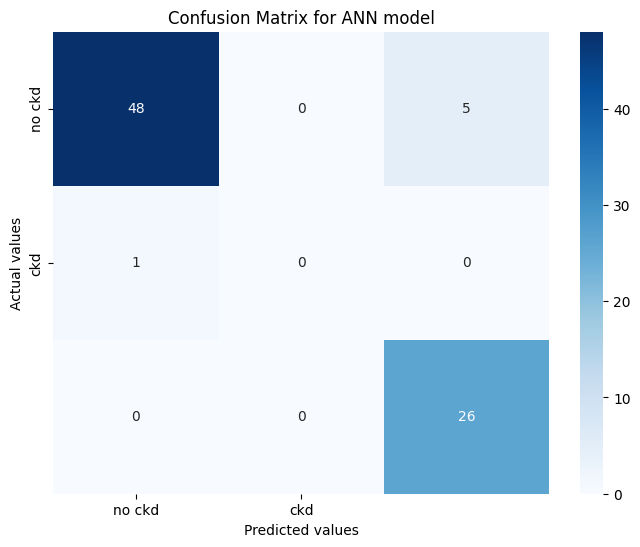

In [68]:
# Plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no ckd', 'ckd'], yticklabels=['no ckd', 'ckd' ])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for ANN model')
plt.show()

In [69]:
bootstraps = []
for model in list(set(final.model.values)):
	model_df = final.loc[final.model == model]
	bootstrap = model_df.sample(n=30, replace=True)
	bootstraps.append(bootstrap)

bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df, id_vars=['model'], var_name='metrics', value_name='values')
time_metrics = ['fit_time', 'score_time']  # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)]  # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)]  # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')


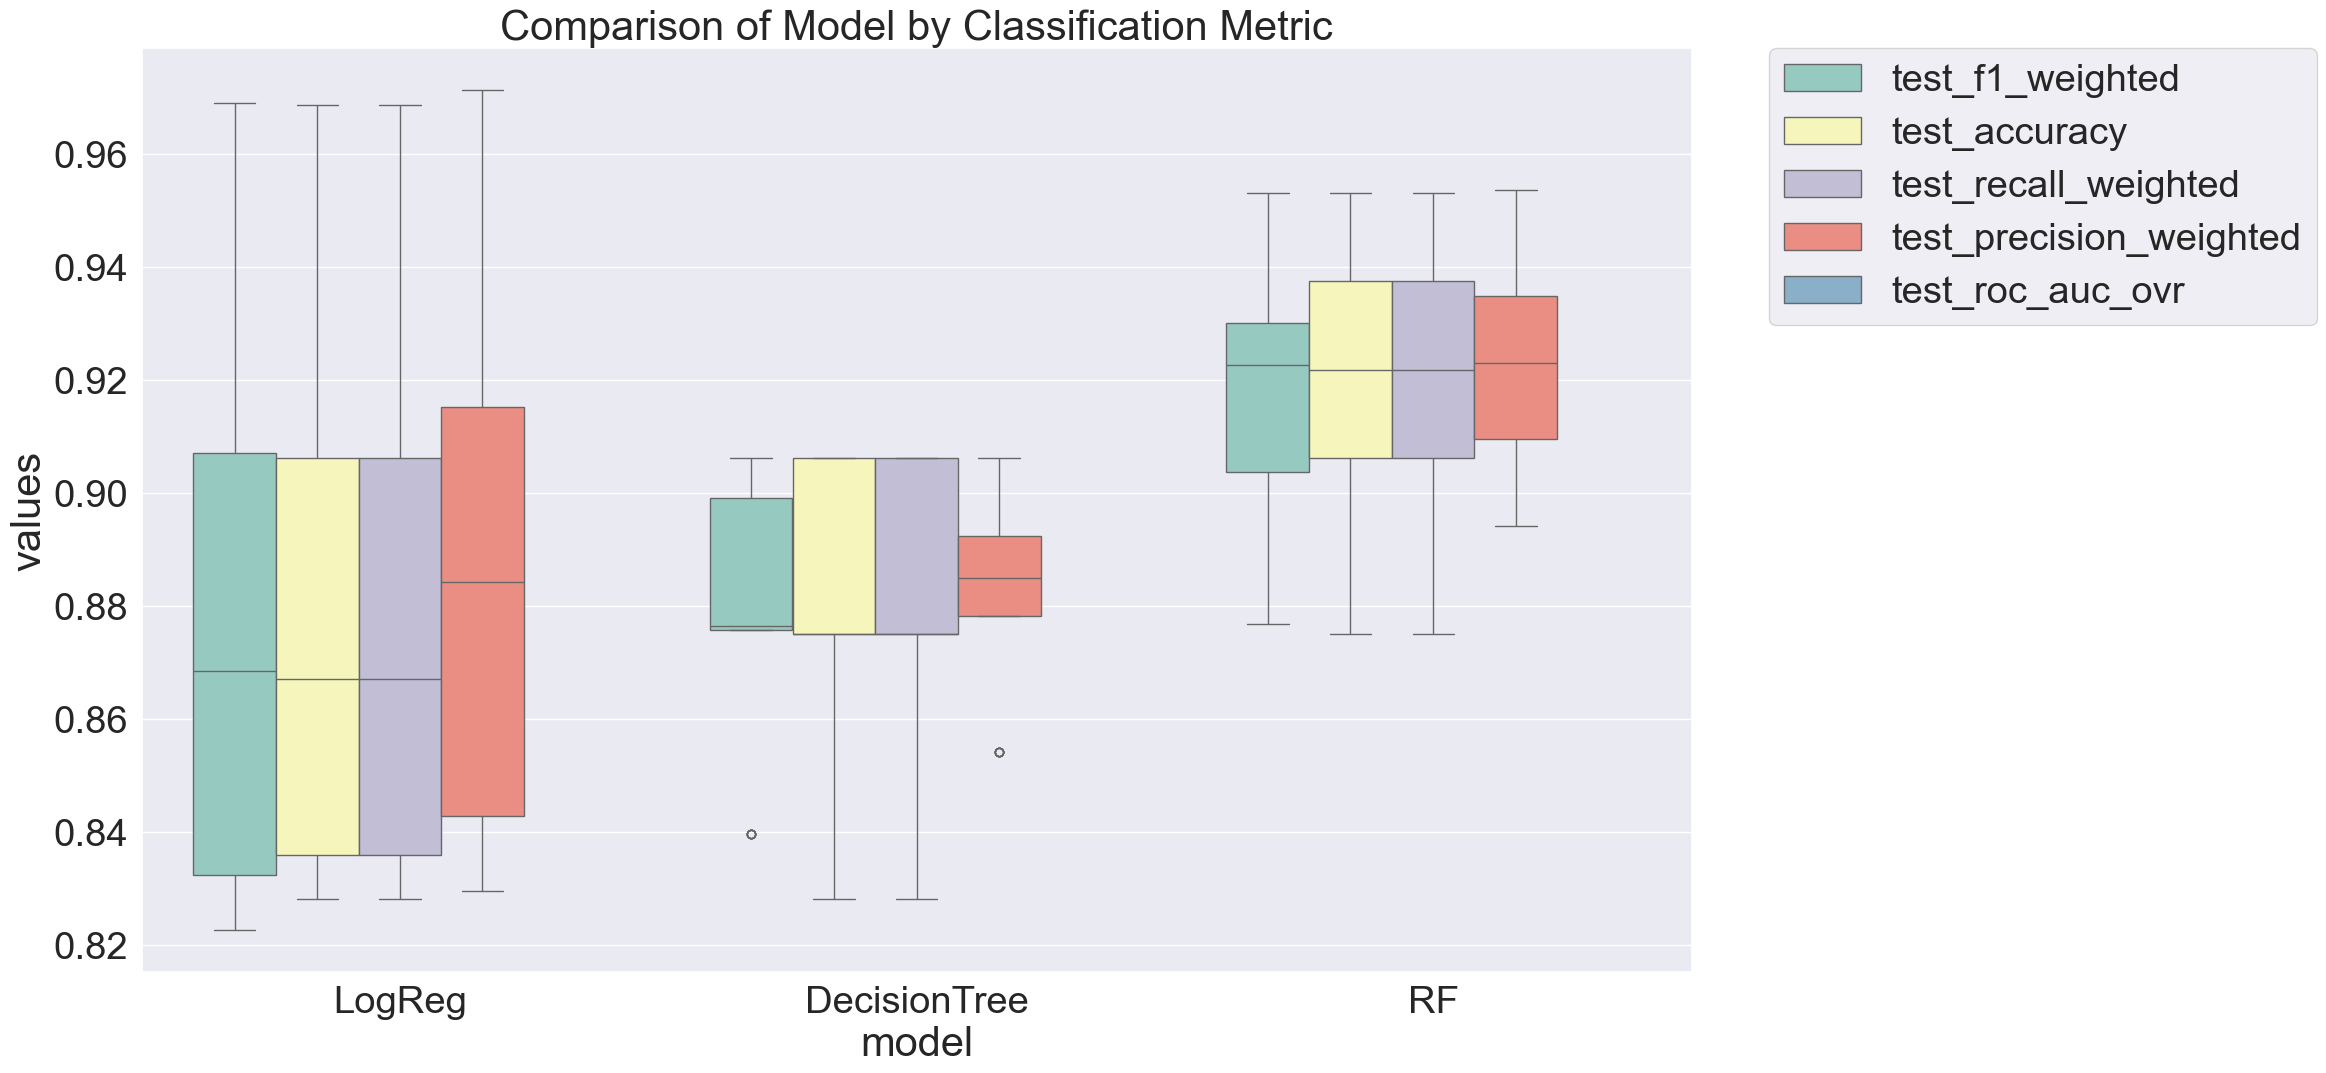

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot (x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)


In [71]:
pickle.dump(lgr, open('CKD.pkl','wb'))